In [1]:
from numpy import random

def rule_one_possible(string):
    
    # If the last letter of the current string is I, rule 1 can be applied
    
    if string[-1:] == 'I':
        return True
    
    else:
        return False


def rule_two_possible(string):
    
    # If the first letter of the current string is M, rule 2 can be applied
    
    if string[:1] == 'M':
        return True
    else:
        return False


def rule_three_possible(string):
    
    # If the current string contains III, rule 3 can be applied
     
    if string.find('III') != -1:
        return True
    else:
        return False
    
    
def rule_four_possible(string):
    
    # If the current string contains UU, rule 4 can be applied
    
    if string.find('UU') != -1:
        return True
    else:
        return False    
    
    
def rule_three_options(string):
    
    indices = [index for index, char in enumerate(string) if string.startswith('III', index)]
    
    return indices
    

def rule_four_options(string):
    
    indices = [index for index, char in enumerate(string) if string.startswith('UU', index)]
    
    return indices


def get_options(string):

    options = []

    if rule_one_possible(string):
        options.append('apply_rule_one(string)')

    if rule_two_possible(string):
        options.append('apply_rule_two(string)')

    if rule_three_possible(string):
        for option in rule_three_options(string):
            options.append(f'apply_rule_three(string, {option})')
        
    if rule_four_possible(string):
        for option in rule_four_options(string):
            options.append(f'apply_rule_four(string, {option})')

    return options


def apply_rule_one(string):
    
    return string + 'U'


def apply_rule_two(string):
    
    return string + string[1:]


def apply_rule_three(string, index):
    
    return string[:index] + 'U' + string[index+3:]


def apply_rule_four(string, index):
    
    return string[:index] + string[index+2:]



def apply_random_option(options):
    
    choice = random.choice(options)
    
    eval(choice)



In [199]:

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [167]:
import pandas as pd


def random_traversal(string, num_moves):
    
    path = [string]
    
    i=0
    while i < num_moves:

        options = get_options(string)

        choice = random.choice(options)

        string = eval(choice)
        
        path.append(string)
    
        i+=1

    return path

In [274]:
allnodes = []

for i in range(100000):
    path = random_traversal('MI', 6)
    allnodes += path

allnodes = set(allnodes)

In [275]:
allnodes

{'MI',
 'MII',
 'MIIII',
 'MIIIII',
 'MIIIIIIII',
 'MIIIIIIIIIIIIIIII',
 'MIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII',
 'MIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII',
 'MIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIU',
 'MIIIIIIIIIIIIIIIIIIIIIIIIIIIIIU',
 'MIIIIIIIIIIIIIIIIIIIIIIIIIIIIUI',
 'MIIIIIIIIIIIIIIIIIIIIIIIIIIUIII',
 'MIIIIIIIIIIIIIIIIIIIIIIIIIUIIII',
 'MIIIIIIIIIIIIIIIIIIIIIIIIUIIIII',
 'MIIIIIIIIIIIIIIIIIIIIIIUIIIIIII',
 'MIIIIIIIIIIIIIIIIIIIIIUIIIIIIII',
 'MIIIIIIIIIIIIIIIIIIIIUIIIIIIIII',
 'MIIIIIIIIIIIIIIIIIIIUIIIIIIIIII',
 'MIIIIIIIIIIIIIIIIIIUIIIIIIIIIII',
 'MIIIIIIIIIIIIIIIIIUIIIIIIIIIIII',
 'MIIIIIIIIIIIIIIIIU',
 'MIIIIIIIIIIIIIIIIUIIIIIIIIIIIII',
 'MIIIIIIIIIIIIIIIIUIIIIIIIIIIIIIIIIU',
 'MIIIIIIIIIIIIIU',
 'MIIIIIIIIIIIIIUIIIIIIIIIIIIIIII',
 'MIIIIIIIIIIIIIUIIIIIIIIIIIIIU',
 'MIIIIIIIIIIIIIUU',
 'MIIIIIIIIIIIIUI',
 'MIIIIIIIIIIIIUIIIIIIIIIIIIIIIII',
 'MIIIIIIIIIIIIUIIIIIIIIIIIIIUI',
 'MIIIIIIIIIIIIUIU',
 'MIIIIIIIIIIIUII',
 'MIIIIIIIIIIIUIIIIIIIIIIIIIIIIII',
 'MIIIII

In [276]:
paths=[]
adj = pd.DataFrame(0, index=list(allnodes), columns=(allnodes))

for i in range(10000):
    
    path = random_traversal('MI', 6)
    
    paths += path
    
    for first, second in zip(path, path[1:]):
        adj.loc[second, first] += 1


In [277]:
for column in list(adj.columns):
    adj.loc[adj[column] > 1, column] = 1

In [214]:
import pygraphviz as pgv
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 300

dag = pgv.AGraph(directed=True)

for node in adj.index:
    dag.add_node(node)

for index in adj.index:
    for child in adj.columns:
        for parent in adj.index[adj[child] == True]:
            dag.add_edge(child, parent)

dag.layout(prog='dot')

pos =

dag.draw('dag.png')

img = mpimg.imread('dag.png')
plt.imshow(img)
plt.show()

AttributeError: Graph has no layout information, see layout() or specify prog=neato|dot|twopi|circo|fdp|nop.

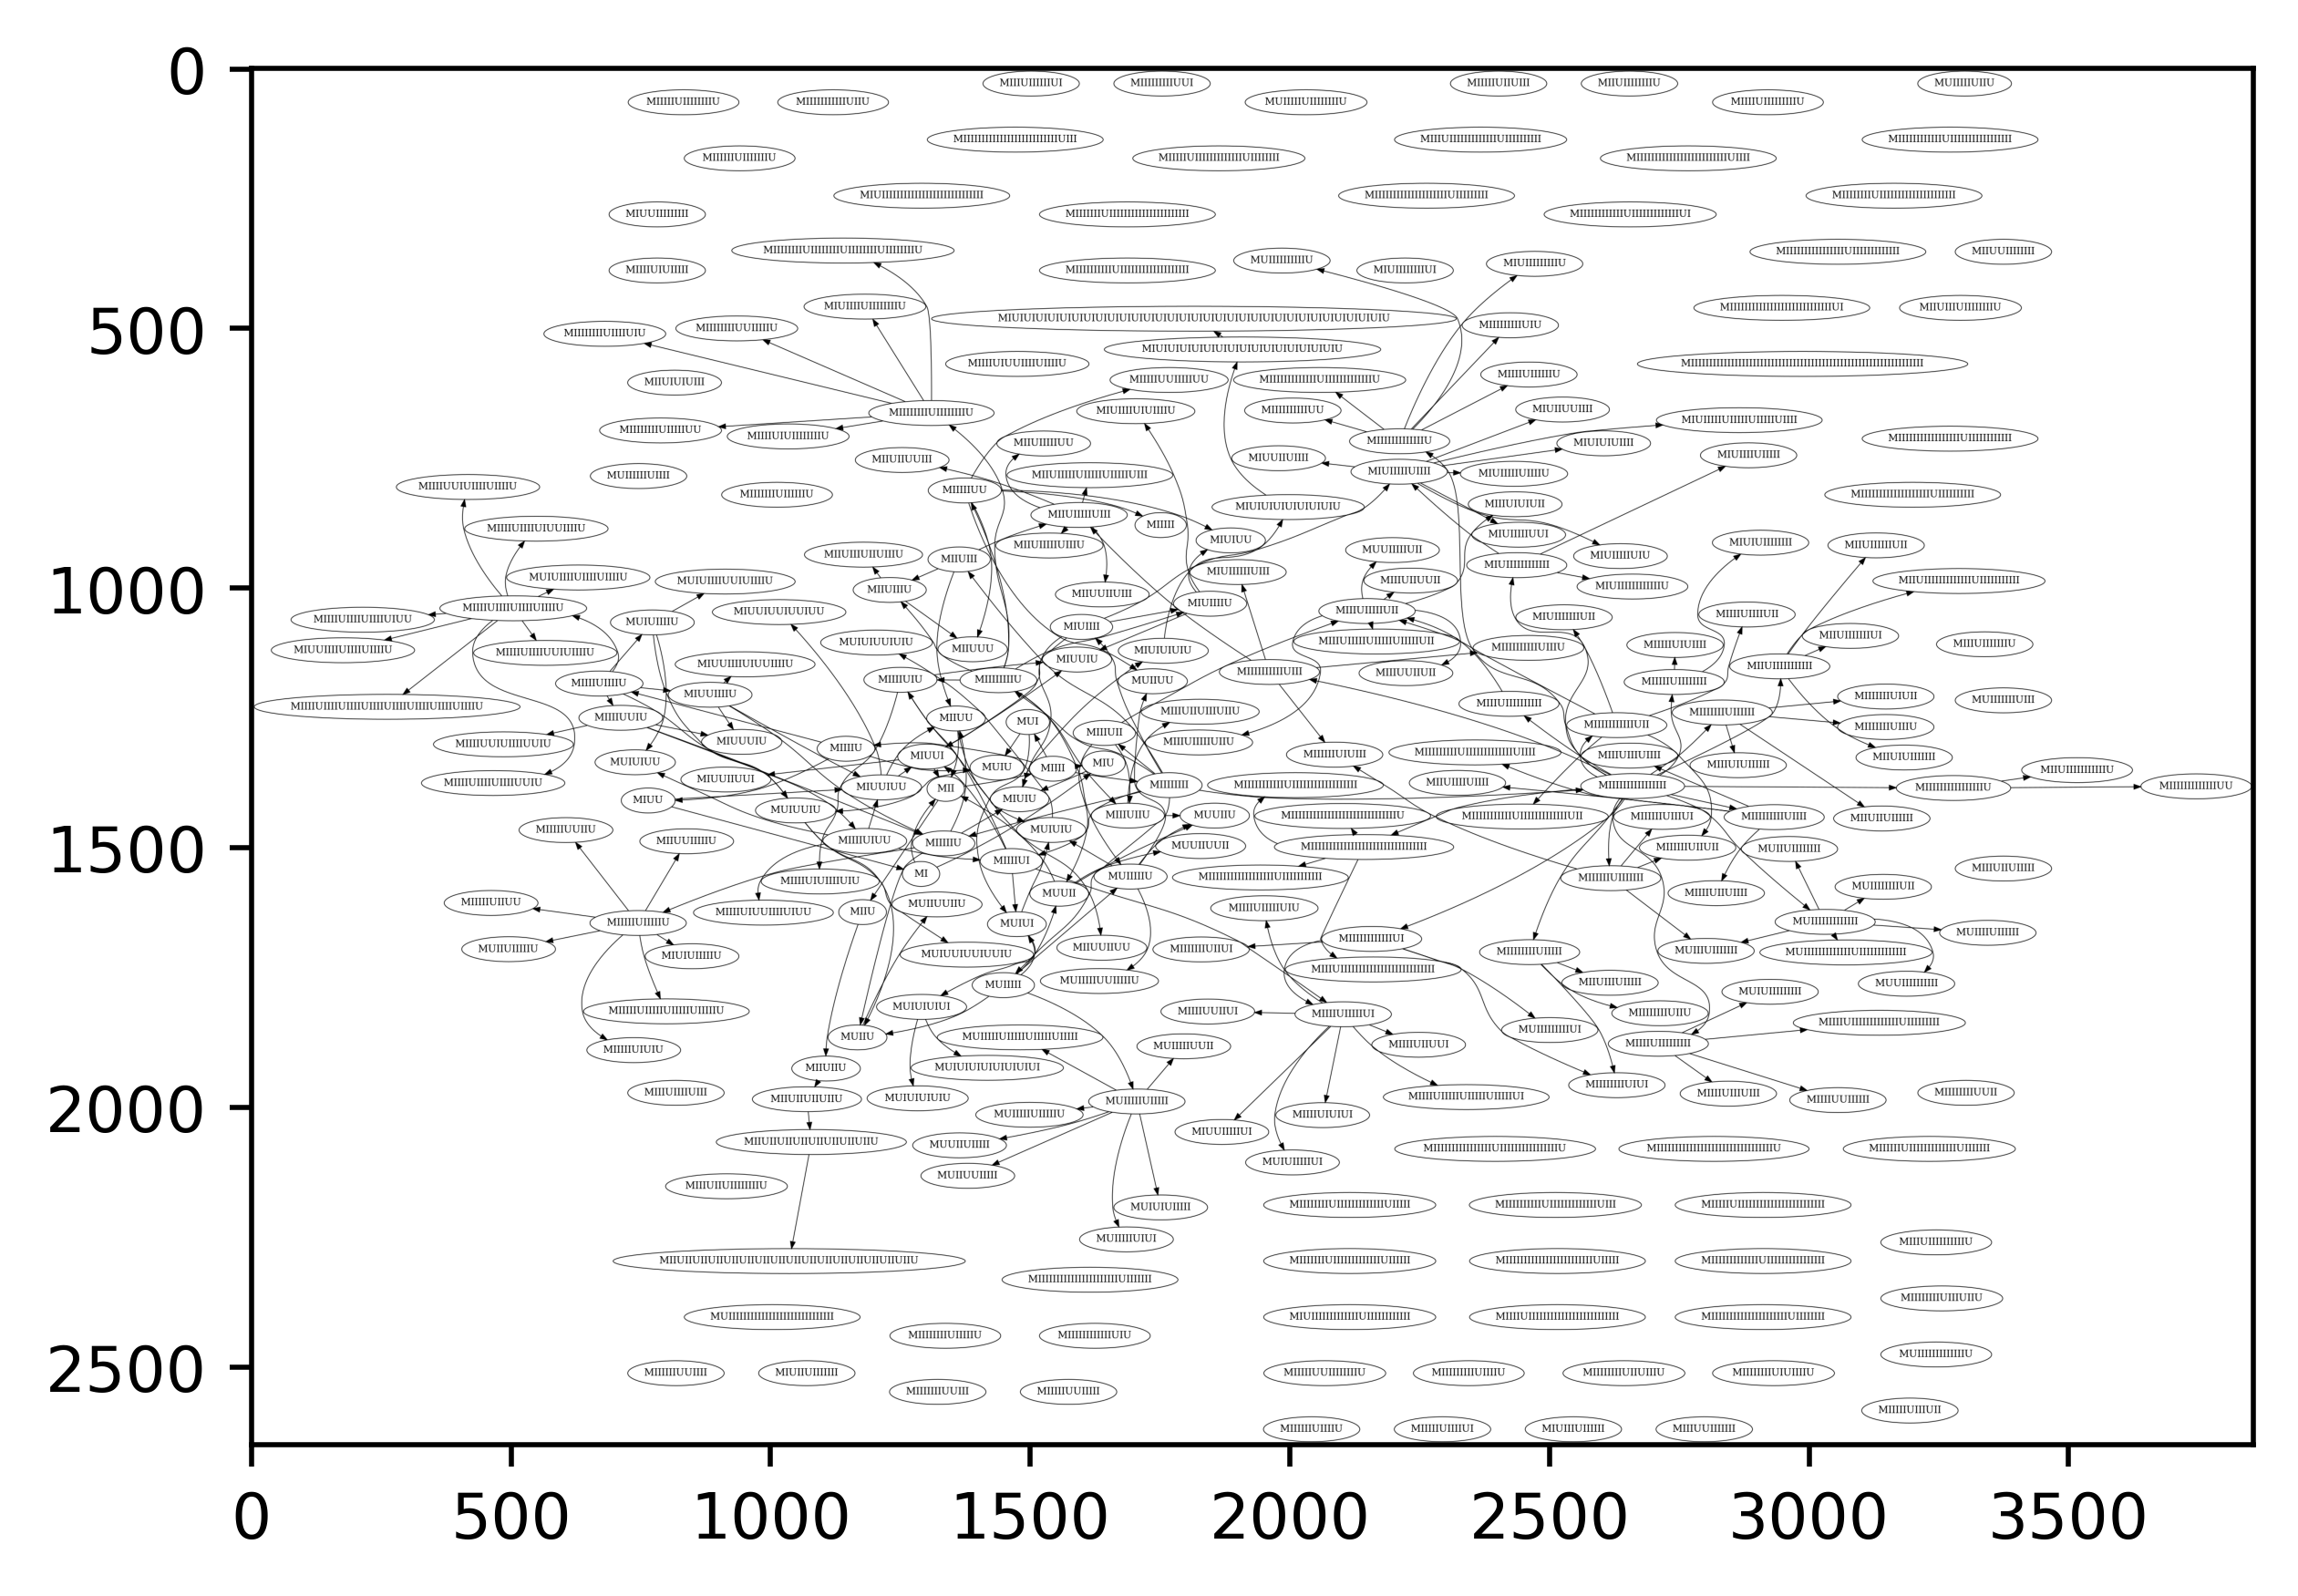

In [278]:
import pygraphviz as pgv
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 500

dag = pgv.AGraph(directed=True, overlap='false', splines='true')

for node in adj.index:
    dag.add_node(node)

for index in adj.index:
    for child in adj.columns:
        for parent in adj.index[adj[child] == True]:
            dag.add_edge(child, parent)
        

dag.layout(prog='fdp')  #neato, dot, twopi, circo, fdp, nop, wc, acyclic, gvpr, gvcolor, ccomps, sccmap, tred, sfdp, unflatten.
dag.draw('dag.png')

img = mpimg.imread('dag.png')#
plt.imshow(img)
plt.show()

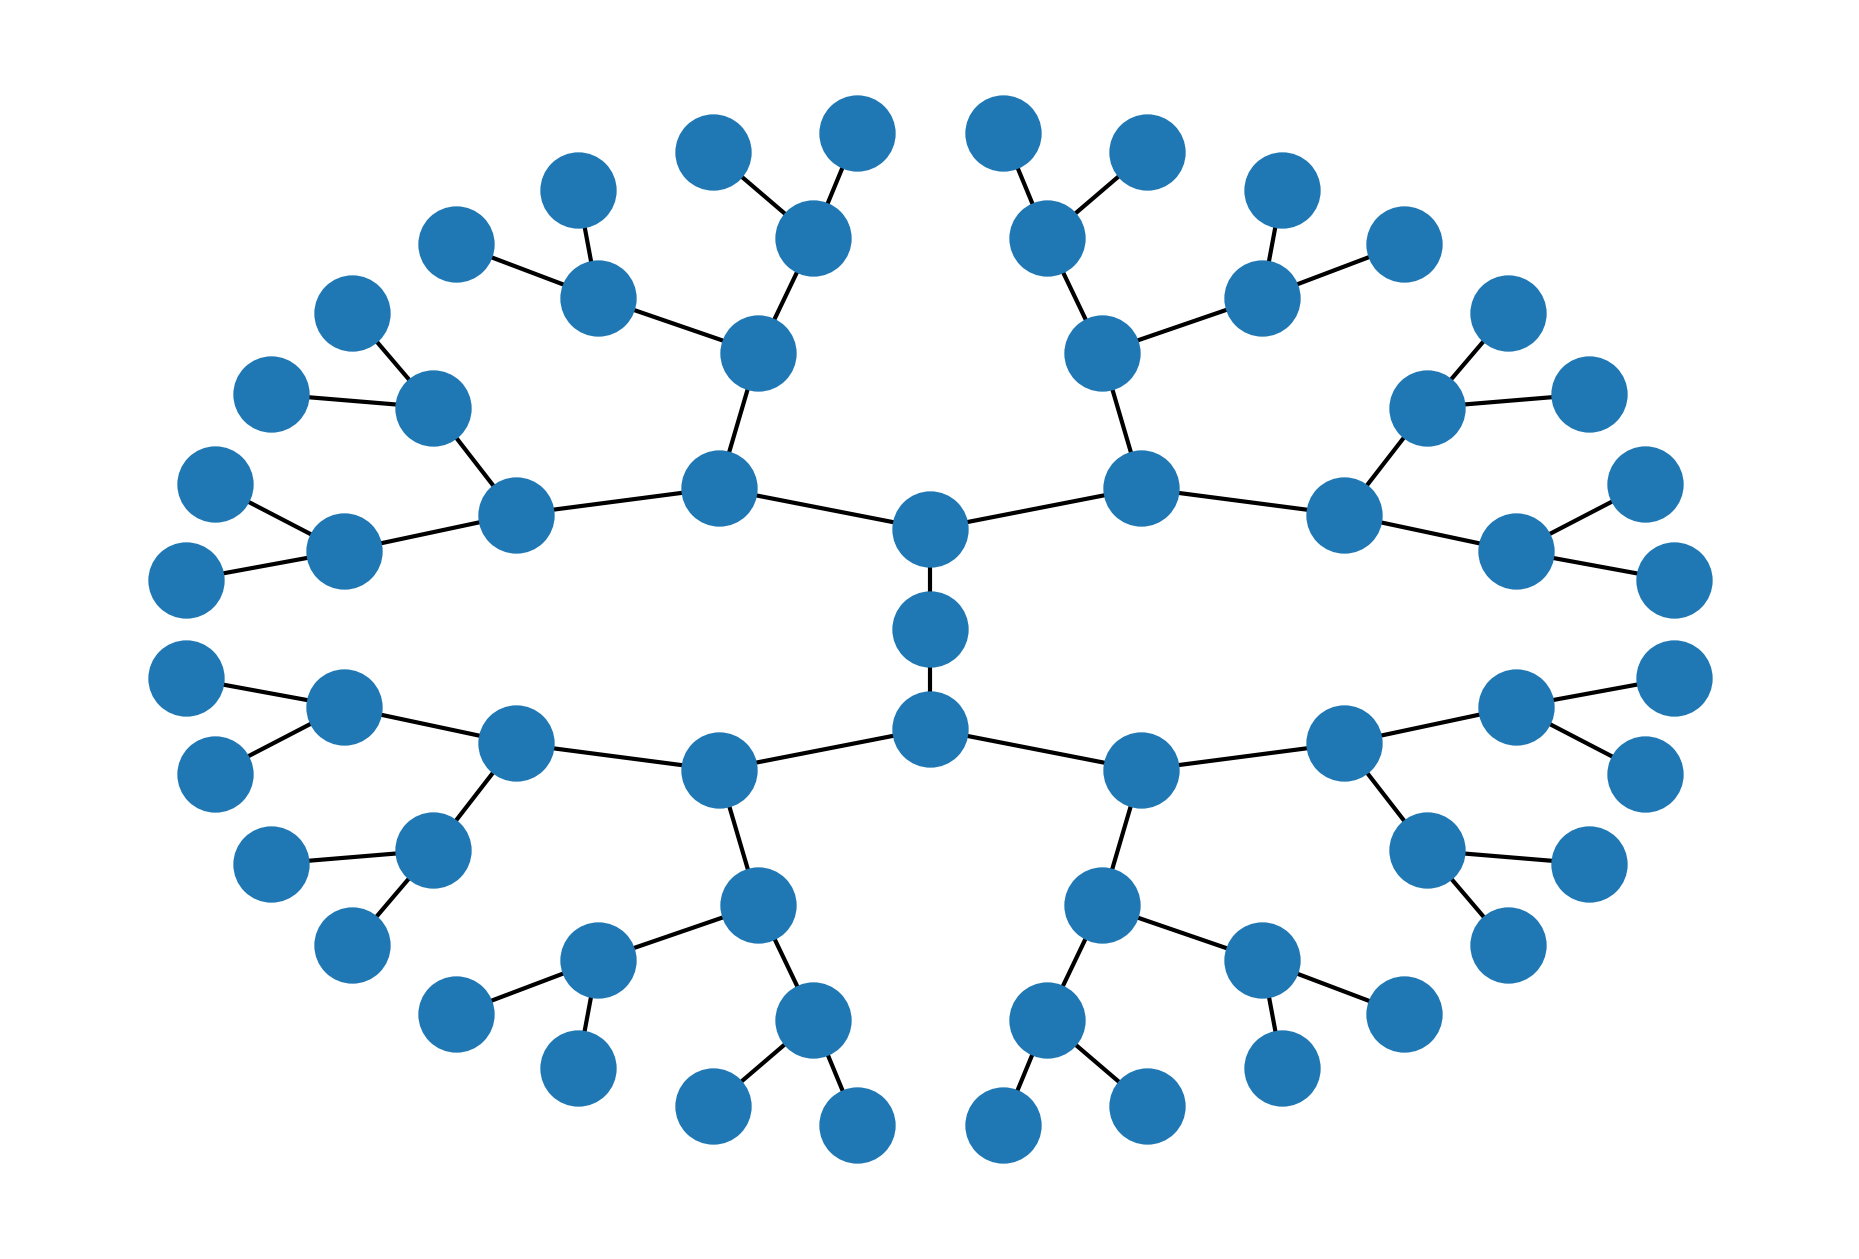

In [216]:
import matplotlib.pyplot as plt
import networkx as nx
import pydot
from networkx.drawing.nx_pydot import graphviz_layout

T = nx.balanced_tree(2, 5)

pos = graphviz_layout(T, prog="twopi")
nx.draw(T, pos)
plt.show()

In [8]:

df = pd.DataFrame(columns=['string'])

for i in range(0, 10):
    
    endstring = apply_rules_randomly('MI', 3)    # 48 possible end states
    
    df.loc[len(df)] = endstring


print(df['string'].value_counts())
print(df['string'].nunique())

MII
MIIII
MIIIIU
MIU
MIUIU
MIUIUIUIU
MII
MIIII
MUI
MII
MIIU
MIIUIIU
MII
MIIII
MUI
MIU
MIUIU
MIUIUIUIU
MIU
MIUIU
MIUIUIUIU
MIU
MIUIU
MIUIUIUIU
MIU
MIUIU
MIUIUIUIU
MIU
MIUIU
MIUIUIUIU
MIUIUIUIU    6
MUI          2
MIIIIU       1
MIIUIIU      1
Name: string, dtype: int64
4


In [206]:
apply_rules_randomly('MI', num_applications=5) 

False
False
False
False
True


'MIIUIIUIIUIIUIIUIIUIIUIIU'

## problem exploration for maximum of 5 successive moves

In [ ]:
"""
Result of:

>>> for i in range(0, 100090):   
>>>    endstring = apply_rules_randomly('MI', 5)
    

MIUIUIUIUIUIUIUIUIUIUIUIUIUIUIUIU    50274
MIIUIIUIIUIIUIIUIIUIIUIIU            25021
MIUIUIUIU                             6256
MUIUUIU                               5242
MUIUIU                                1550
MUIUIUIUI                             1547
MIUUIUU                               1031
MI                                     994
MIUUIIIIU                              430
MUIUIIIIU                              430
MIUIU                                  425
MIIIIUIIIIUIIIIUIIIIU                  420
MIIIIUUIU                              419
MIIUU                                  410
MIUUI                                  389
MIIIUIIU                               386
MIIUIIIU                               383
MUUII                                  383
MIIIIUIUU                              369
MUIUI                                  339
MUIIU                                  330
MIUIIIIU                               311
MIIIIUIU                               298
MIIIUIIIIIUII                          293
MIIUIIIIIUIII                          269
MUIIIIIU                               247
MIIIIIUIIIIIU                          193
MIIIIUIIIIIUI                          186
MIUIIIIIUIIII                          160
MUIIIIIUIIIII                          150
MIIIIIIIIUIIIIIIIIU                    110
MIIIIIUU                               102
MIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII       56
MIIIIIIIIIIIIIIIIU                      55
MIIIIIIIIIIIIUI                         55
MIIIIIUIIIIIIII                         54
MIIIIIIUIIIIIII                         51
MIIIIIIIIUIIIII                         51
MIIIIIIIIIIIIIU                         50
MIIIIIIIIIIUIII                         46
MIIIIIIIIIUIIII                         46
MIIIIIIIIIIIUII                         44
MIIIIIIIUIIIIII                         43
MIUIIIIIIIIIIII                         42
MIIUIIIIIIIIIII                         41
MIIIIUIIIIIIIII                         38
MUIIIIIIIIIIIII                         38
MIIIUIIIIIIIIII                         33
"""


df = pd.DataFrame(columns=['string'])

for i in range(0, 1000):
    
    endstring = apply_rules_randomly('MI', 5)    # 48 possible end states
    
    df.loc[len(df)] = endstring


print(df['string'].value_counts())
print(df['string'].nunique())

In [159]:
endpoints = ['MIUIUIUIUIUIUIUIUIUIUIUIUIUIUIUIU',
'MIIUIIUIIUIIUIIUIIUIIUIIU',
'MIUIUIUIU',
'MUIUUIU',
'MUIUIU',
'MUIUIUIUI',
'MIUUIUU',
'MI',
'MIUUIIIIU',
'MUIUIIIIU',
'MIUIU',
'MIIIIUIIIIUIIIIUIIIIU',
'MIIIIUUIU',
'MIIUU',
'MIUUI',
'MIIIUIIU',
'MIIUIIIU',
'MUUII',
'MIIIIUIUU',
'MUIUI',
'MUIIU',
'MIUIIIIU',
'MIIIIUIU',
'MIIIUIIIIIUII',
'MIIUIIIIIUIII',
'MUIIIIIU',
'MIIIIIUIIIIIU',
'MIIIIUIIIIIUI',
'MIUIIIIIUIIII',
'MUIIIIIUIIIII',
'MIIIIIIIIUIIIIIIIIU',
'MIIIIIUU',
'MIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII',
'MIIIIIIIIIIIIIIIIU',
'MIIIIIIIIIIIIUI',
'MIIIIIUIIIIIIII',
'MIIIIIIUIIIIIII',
'MIIIIIIIIUIIIII',
'MIIIIIIIIIIIIIU',
'MIIIIIIIIIIUIII',
'MIIIIIIIIIUIIII',
'MIIIIIIIIIIIUII',
'MIIIIIIIUIIIIII',
'MIUIIIIIIIIIIII',
'MIIUIIIIIIIIIII',
'MIIIIUIIIIIIIII',
'MUIIIIIIIIIIIII',
'MIIIUIIIIIIIIII']